In [12]:
import sys
import os
sys.path.append(os.getcwd() + "/..")
import ws.scrapers as sc
import ws.jsontosql
import pandas as pd
import json
import pickle
import time
import sqlite3
import sqlalchemy

engine = sqlalchemy.create_engine('sqlite:///../data/db.sqlite')
conn = sqlite3.connect('../data/db.sqlite')

In [16]:
matches = pd.read_sql("SELECT * FROM matches", con = engine, parse_dates = ["date"])


In [18]:
ins = sqlalchemy.inspect(engine)

In [19]:
ins.get_table_names()

['events', 'matches', 'players', 'qualifiers', 'teams']

In [21]:
ins.get_columns("events")[0]["name"]

'keyid'

In [32]:
results = engine.execute("SELECT * FROM matches LIMIT 10").fetchall()

In [34]:
print (results.keys())

AttributeError: 'list' object has no attribute 'keys'

In [37]:
lista = []

for row in results:
    lista.append(dict(row))



In [42]:
pd.DataFrame(lista)["wsmatchid"][1]

'335108'

In [48]:
matches.dtypes

wsmatchid               object
league                  object
season                  object
date            datetime64[ns]
hometeamid               int64
awayteamid               int64
hometeamname            object
awayteamname            object
homescore               object
awayscore               object
homepkscore             object
awaypkscore             object
referee                 object
managerhome             object
manageraway             object
attendance               int64
venuename               object
dtype: object

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline

x_size = 105.0
y_size = 68.0


def draw_pitch():
    
    x_size = 105.0
    y_size = 68.0
    #set up field    
    fig = plt.figure(figsize=(x_size/10, y_size/10))
    fig.patch.set_facecolor('white')

    axes = fig.add_subplot(1, 1, 1, axisbg='white')

    axes.xaxis.set_visible(False)
    axes.yaxis.set_visible(False)

    plt.xlim([-5,x_size+5])
    plt.ylim([-5,y_size+5])

    box_height = ((16.5*2 + 7.32)/y_size)/1.15
    box_width = (16.5/x_size)/1.15

    team_colors = {'H': 'red',
                   'A': 'white'}    

    r1 = plt.Rectangle((0.04338, 0.0641), (0.95652-0.04338), (0.9359-0.0641),
                       edgecolor="black", facecolor="none", alpha=1, transform=axes.transAxes) #pitch

    r2 = plt.Line2D([0.5, 0.5], [0.9359, 0.0641],
                    c='black', transform=axes.transAxes) #half-way line

    r3 = plt.Rectangle((0.04338, (1-box_height)/2), box_width, box_height,
                       ec='black', fc='none', transform=axes.transAxes) #penalty area

    r4 = plt.Rectangle((0.95652-box_width, (1-box_height)/2), box_width, box_height,
                       ec='black', fc='none', transform=axes.transAxes) #penalty area

    r5 = Ellipse((0.5, 0.5), 9.15*2/x_size, 9.15*2/y_size,
                                    ec='black', fc='none', transform=axes.transAxes) #middle circle

    fig.lines.extend([r1, r2, r3, r4, r5])
    
    return fig, axes

/Users/cgnal/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(<matplotlib.figure.Figure at 0x10b61ff98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b703978>)

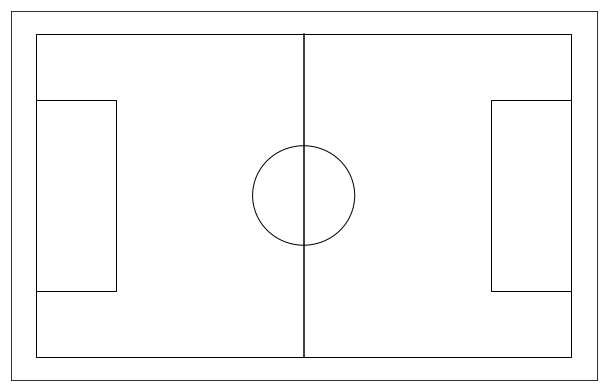

In [5]:
draw_pitch()